coste: 303.9931922202643
grad [[-15.21968234]
 [598.25074417]]


  NIT   NF   F                       GTG
    0    1  1.462106922645887E+02   7.48186732E+04
tnc: fscale = 0.00182795
    1    3  2.251458856579509E-03   5.04839909E-03
tnc: fscale = 7.03709
    2   35  1.064436024409298E-03   3.45006854E-01
    3   60  3.266005333082871E-04   1.72386592E-02
    4   68  2.106297558868682E-05   9.82584134E-03
    5   74  7.578131559049685E-07   1.30010867E-04
    5  100  7.578131559049685E-07   1.30010867E-04
tnc: Maximum number of function evaluations reached
  NIT   NF   F                       GTG
    0    1  2.881123740891748E+02   3.18613844E+05
tnc: fscale = 0.000885804
    1    3  2.007423903992150E-01   3.53650561E-02
tnc: fscale = 2.65878
    2    5  6.679155750748239E-03   3.33615936E-01
    3    7  6.288171963263115E-03   2.83599636E-06
tnc: fscale = 296.905
    3   40  6.288171963263115E-03   2.83599636E-06
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.934101473024785E+02   1.68420784E+05
tnc: fscale = 0.001

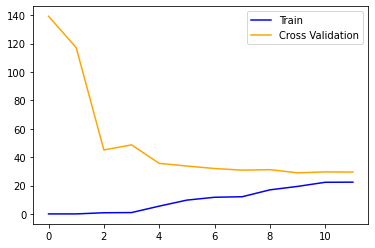

In [16]:
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

#Función para el coste
def coste(theta, X, y, landa, m):
    h = np.dot(X, theta[:, None])

    thetaAux = np.delete(theta, 0, 0)
    return ((1 / (2 * m)) * (np.sum(np.square(h - y)))) + ((landa / (2 * m)) * np.sum(np.square(thetaAux)))
    
#Función para calculo de gradiente
def gradiente(theta, XX, Y, landa, m):
    h = np.dot(XX, theta[:, None])

    #Eliminamos la primera columna de theta
    thetaAux = np.delete(theta, 0, 0)
    res = (1 / m) * np.matmul(XX.T, h - Y)+((landa/m) * thetaAux)
    return res

def calcOptTheta(X, Y, landa, theta):
    result = opt.fmin_tnc(func=coste, x0=theta, fprime=gradiente, args=(X, Y, landa, X.shape[0]))
    return result[0]

def curva_aprendizaje(X, y, landa, theta, Xval, yval):

    err1 = np.zeros((len(X)))
    err2 = np.zeros((len(Xval)))

    i = 1
    while (i < len(X) + 1):
        thetas = calcOptTheta(X[0:i], y[0:i], landa, theta)
        
        err1[i - 1] = calc_error(thetas, X[0:i], y[0:i], landa, len(X))
        err2[i - 1] = calc_error(thetas, Xval, yval, landa, len(Xval))
        i += 1   

    return err1, err2    

def calc_error(theta, X, y, landa, m):
    h = np.dot(X, theta[:, None])
    return (1 / (2 * m)) * ((np.sum(np.square(h - y))))

def pinta_Curva_Aprendizaje(err1, err2):
    
    a = np.arange(len(err1))
    b = err1
    plt.plot(a, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(a, d, c="orange", label="Cross Validation")

def main():
    data = loadmat("ex5data1.mat")

    X = data["X"]
    y = data["y"]
    Xval = data["Xval"]
    yval = data["yval"]

    landa = 1

    XwithOnes=np.hstack((np.ones(shape=(X.shape[0],1)),X))

    XvalWithOnes = np.hstack((np.ones(shape=(Xval.shape[0],1)),Xval))

    theta = np.ones(XwithOnes.shape[1])
    m = XwithOnes.shape[0]
    
    cost = coste(theta, XwithOnes, y, landa, m)
    print("coste:", cost)
    grad = gradiente(theta, XwithOnes, y, landa, m)
    print("grad", grad)

    err1, err2 = curva_aprendizaje(XwithOnes, y, landa, theta, XvalWithOnes, yval)

    pinta_Curva_Aprendizaje(err1, err2)

    plt.legend()
    plt.show()

main()